In [1]:
import pandas as pd
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string
from nltk import ngrams

In [2]:
jawaban = pd.read_csv("datajawaban.csv")
kunci = pd.read_csv("datakunci.csv")
nilaidosen = pd.read_csv("datanilai.csv")

In [3]:
jawaban["1"][0]

'Komunikasi adalah suatu proses penyampaian informasi (pesan, ide, gagasan) dari satu pihak kepada pihak lain. Pada umumnya, komunikasi dilakukan secara lisan atau verbal yang dapat dimengerti oleh kedua belah pihak.'

In [4]:
kunci

,1,2,3,4,5,6,7,8
0,"Menurut Sunu, komunikasi adalah upaya seseoran...","Komunikator, Pesan, Komunikan, Media, Pengaruh","Langkah pertama adalah ide, yang ebrsumber dar...",Komunikasi resmi adalah sebutan lain untuk kom...,Komunikasi ke atas dilakukan mengalir dari baw...,pengiriman dan penerimaan berbagai pesan organ...,Fungsi kontrol Komunikasi dapat dipakai untuk ...,Komunikasi internal adalah komunikasi yang dij...


In [5]:
nilaidosen.head()

,1,2,3,4,5,6,7,8
0,70,90,10,90,80,10,40,100
1,70,90,60,90,80,70,80,100
2,70,90,70,80,100,100,90,100
3,80,100,60,80,90,70,60,90
4,60,90,80,80,90,60,10,100


In [6]:
#jpre = []
#ind=0
#for i in jawaban:
#    temp = []
#    for j in jawaban[i]:
#        lowertext = j.lower()
#        j = re.sub("[^a-zA-Z0-9_]", " ",str(lowertext))
#        words = j.split()
#        stop_words = [line.rstrip('\n') for line in open('stopwordlist.txt')]
#        filtered_text = [word for word in words if word not in stop_words]
#        factory = StemmerFactory()
#        stemmer = factory.create_stemmer()
#        stemming = []
#        for a in filtered_text:
#            b   = stemmer.stem(a)
#            stemming.append(b)
#        a = " ".join(w for w in stemming)
#        
#        temp.append(a)
#    jpre.append(temp)

In [7]:
#np.save("jawabanprepocessing", jpre)

In [8]:
jpre = np.load('jawabanprepocessing.npy', allow_pickle=True)
j=pd.DataFrame(jpre)

In [9]:
j

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,komunikasi proses sampai informasi pesan ide g...,komunikasi upaya informasi orang sesuai tingka...,komunikasi proses sampai pesan kirim pesan kom...,karfried knapp komunikasi interaksi pribadi si...,buku ilmu komunikasi antar karang dedy mulyana...,interaksi personal symbol linguistic bahasa li...,komuniaksi aktivitas sampai informasi pesan id...,komunikasi asal communication sunu komunikasi ...,komunikasi proses orang kelompok organisasi ma...,proses orang kelompok organisasi masyarakat ci...,...,sunu komunukasi uoaya informasi orang catayang...,komunikasi aktivitas sampai informasi pesan id...,komunikasi butuh dasar manusia tukar informasi...,komunikasi proses upaya informasi bahasa lisan...,komunikasi butuh dasar manusia makhluk sosial,komunikasi salur ide maksud sumber sumber tuju...,komunikasi butuh dasar manusia dipungkiri utam...,komunikasi communication,komunikasi upaya menyampaikani nformasi orang ...,komunikasi upaya informasi orang sesuai tingka...
1,kirim komunikator sender kirim pesan pesan mes...,komunikator bawa pesan pesan komunikan terima ...,komunikasi minimal komunikator beri pesan pesa...,unsur komunikasi wilbur schramm komunikator ba...,1 komunikator tindak sebar informasi komunikas...,wilbur schramm komunikator bawa pesan pesan ko...,unsur komunikasi 1 komunikator 2 pesan 3 komun...,komunikator pesan komunikan media pengaruh,sumber komunikator pesan channel komunikasi,sumber komunikator pesan channel komunikasi efek,...,laswell 1 komunikator 2 pesan 3 komunikan 4 me...,kirim terima pesan informasi media sarana komu...,komunikator orang bawa pesan pesan komunikan o...,unsur komunikasi wilbur schramm komunikator ba...,unsur komunikasi laswell komunikator bawa pesa...,kirim terima pesan informasi media sarana komu...,wilbur schramm unsur komunikasi 3 1 komunikato...,wilbur schramm 1 komunikator bawa pesan 2 pesa...,komunikasi komunikan peesan media pengaruh,1 komunikator 2 pesan 3 komunikan 4 media 5 pe...
2,ringkas proses langsung komunikasi gambar komu...,proses aktivitas komunikasi komunikator pesan ...,sederhana proses komunikasi komunikator beri p...,proses komunikasi kirim pesan pesan media teri...,penginterprestasian interpretasi motif komunik...,ajak komunikasi lawan komunikasi antara komuni...,komunikator bawa pesan pesan komunikan terima ...,syarat komunikasi unsur unsur komunikasi conto...,komunikator maksud komunikasi orang mengirimka...,komunikator sampai pesan channel media sampai ...,...,proses komunikasi lasswell kirim pesan sender ...,komunikator maksud komunikasi orang mengirimka...,proses aktifitas komunikasi penuh unsur unsur ...,proses komunikasi awal kirim pesan media terim...,1 interpretasi interpretasi langkah proses kom...,proses komunikasi kirim pesan sender pesan mes...,komunikator kirim pesan komunikan komunikan te...,1 interpretasi interpretasi langkah proses kom...,proses manusia komunikator manusia komunikan u...,proses sampai pesan informasi pengaruh
3,komunikasi formal jalur resmi lembaga sesuai i...,komunikasi formal komunikasi jalur resmi lemba...,komunikasi formal komunikasi jalur resmi lemba...,komunikasi formal jalur resmi lembaga sesuai i...,komunikasi formal komunikasi sifat formal jala...,komunikasi formal komunikasi formal jalur resm...,komunikasi formal komunikasi jalur resmi lemba...,komunikasi formal jalur resmi lembaga sesuai i...,komunikator maksud komunikasi orang mengirimka...,komunikasi informal komunikasi orang organisas...,...,komunikasi formal jalur resmi lembaga sesuai i...,komunikasi formal komunikasi dasar sistem hier...,komunikasi formal komunikasi atas bawah rekan ...,komunikasi formal jalur resmi lembaga sesuai i...,komunikasi formal proses komunikasi sifat resm...,komunikasi formal komunikasi formal organisasi...,1 komunikasi formal jalur resmi lembaga sesuai...,komunikasi formal komunikasi formal jalur resm...,komunikasi formal komunikasi jalur resmi lemba...,komunikasi formal jalur resmi le

In [10]:
    #jpre.append(temp)
jpre[1]

array(['kirim komunikator sender kirim pesan pesan message isi maksud salur channel media pesan komunikan komunikasi pribadi tatap muka salur udara alir getar nada suara terima komunikan receiver terima pesan umpan feedback tanggap terima pesan isi pesan sampai',
       'komunikator bawa pesan pesan komunikan terima pesan',
       'komunikasi minimal komunikator beri pesan pesan komunikan terima pesan',
       'unsur komunikasi wilbur schramm komunikator bawa pesan pesan komunikan terima pesan unsur komunikasi laswell komunikator pesan komunikan media pengaruh',
       '1 komunikator tindak sebar informasi komunikasi 2 pesan informasi komunikasi 3 media komunikasi media alat fungsi komunikasi 4 komunikan beda komunikator komunikan fungsi terima informasi komunikator 5 feedback respon komunikan terima pesan komunikator',
       'wilbur schramm komunikator bawa pesan pesan komunikan terima pesan laswell komunikator pesan komunikan media pengaruh',
       'unsur komunikasi 1 komunikator 2

In [11]:
kpre = []
for i in kunci:
    for j in kunci[i]:
        lowertext = j.lower()
        j = re.sub("[^a-zA-Z0-9_]", " ",str(lowertext))
        words = j.split()
        stop_words = [line.rstrip('\n') for line in open('stopwordlist.txt')]
        filtered_text = [word for word in words if word not in stop_words]
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        stemming = []
        for a in filtered_text:
            b   = stemmer.stem(a)
            stemming.append(b)
        a = " ".join(w for w in stemming)
        
        kpre.append(a)

In [12]:
k=pd.DataFrame(kpre)
kpre[7]

'komunikasi internal komunikasi jalin internal organisasi contoh interaksi atas bawah komunikasi vertikal rekan jawat organisasi komunikasi horizontal komunikasi eksternal komunikasi organisasi organisasi masyarakat komunikator humas hubung masyarakat kadangkala pimpin organisasi komunikator langsung pimpin organisasi komunikasi bagi 2 komunikasi organisasi khalayak ramai press release liftlet spanduk media cetak online selebaran dll komunikasi khalayak ramai organisasi tatap muka lisan kirim surat'

In [13]:
k

,0
0,sunu komunikasi upaya informasi orang sesuai t...
1,komunikator pesan komunikan media pengaruh
2,langkah ide ebrsumber komunikator langkah ide ...
3,komunikasi resmi sebut komunikasi formal komun...
4,komunikasi alir bawah atas komunikasi bawah ko...
5,kirim terima pesan organisasi dalam kelompok f...
6,fungsi kontrol komunikasi pakai kontrol perila...
7,komunikasi internal komunikasi jalin internal ...


In [14]:
npk = []
for i in kpre:
    #print(i)
    temp = "".join(i.split())
    npk.append(temp)
npk[0]

'sunukomunikasiupayainformasiorangsesuaitingkatpahamorangtujuriniwati2016laswellkomunikasiprosesefeksuprapto2009theodorsonthedorsonkomunikasisebardatainfomasibentuksymbolsimbolorangkralfriedknappkomunikasiinteraksiantarpersonalsymbollinguisticbahasalisanbahasatubuhgambarlangsunglangsung'

In [15]:
npj = []

for i in range(len(jpre)):
    tampung = []
    for j in range(len(jpre[i])):
        temp = "".join(jpre[i][j].split())
        tampung.append(temp)
    npj.append(tampung)
npj[0][0]

'komunikasiprosessampaiinformasipesanidegagaskomunikasilisanverbalertibelah'

In [16]:
kgram = []

for i in npk:
    temp = [i[j:j+4] for j in range(0, len(i), 1)]
    kgram.append(temp)

print(kgram[0])

['sunu', 'unuk', 'nuko', 'ukom', 'komu', 'omun', 'muni', 'unik', 'nika', 'ikas', 'kasi', 'asiu', 'siup', 'iupa', 'upay', 'paya', 'ayai', 'yain', 'ainf', 'info', 'nfor', 'form', 'orma', 'rmas', 'masi', 'asio', 'sior', 'iora', 'oran', 'rang', 'angs', 'ngse', 'gses', 'sesu', 'esua', 'suai', 'uait', 'aiti', 'itin', 'ting', 'ingk', 'ngka', 'gkat', 'katp', 'atpa', 'tpah', 'paha', 'aham', 'hamo', 'amor', 'mora', 'oran', 'rang', 'angt', 'ngtu', 'gtuj', 'tuju', 'ujur', 'juri', 'urin', 'rini', 'iniw', 'niwa', 'iwat', 'wati', 'ati2', 'ti20', 'i201', '2016', '016l', '16la', '6las', 'lasw', 'aswe', 'swel', 'well', 'ellk', 'llko', 'lkom', 'komu', 'omun', 'muni', 'unik', 'nika', 'ikas', 'kasi', 'asip', 'sipr', 'ipro', 'pros', 'rose', 'oses', 'sese', 'esef', 'sefe', 'efek', 'feks', 'eksu', 'ksup', 'supr', 'upra', 'prap', 'rapt', 'apto', 'pto2', 'to20', 'o200', '2009', '009t', '09th', '9the', 'theo', 'heod', 'eodo', 'odor', 'dors', 'orso', 'rson', 'sont', 'onth', 'nthe', 'thed', 'hedo', 'edor', 'dors',

In [17]:
for i in range(len(kgram)):
    for j in range(len(kgram[i])):
        if len(kgram[i][j])<4:
            kgram[i][j] = ""
        else:
            a = (ord(kgram[i][j][0]))*(2**3)
            b = (ord(kgram[i][j][1]))*(2**2)
            c = (ord(kgram[i][j][2]))*(2**1)
            d = (ord(kgram[i][j][3]))*(2**0)
            kgram[i][j] = str(a+b+c+d)

In [18]:
print(kgram[0])

['1725', '1717', '1673', '1695', '1635', '1668', '1665', '1693', '1611', '1577', '1579', '1563', '1686', '1629', '1699', '1623', '1559', '1676', '1518', '1595', '1624', '1597', '1659', '1657', '1595', '1557', '1676', '1609', '1648', '1623', '1537', '1623', '1601', '1671', '1599', '1687', '1650', '1533', '1624', '1671', '1593', '1603', '1562', '1588', '1561', '1674', '1589', '1495', '1549', '1548', '1641', '1648', '1623', '1538', '1641', '1628', '1725', '1708', '1649', '1712', '1657', '1609', '1635', '1626', '1677', '1500', '1496', '1185', '744', '796', '921', '1173', '1601', '1575', '1706', '1680', '1563', '1621', '1623', '1635', '1668', '1665', '1693', '1611', '1577', '1579', '1558', '1678', '1627', '1689', '1687', '1665', '1655', '1572', '1629', '1525', '1549', '1583', '1662', '1726', '1709', '1658', '1640', '1567', '1632', '1520', '1232', '745', '806', '948', '1229', '1657', '1558', '1563', '1624', '1587', '1685', '1704', '1700', '1664', '1653', '1646', '1547', '1544', '1587', '1685

In [19]:
fkgram = []
for i in kgram:
    temp = " ".join(i)
    fkgram.append(temp)
fkgram[0]

'1725 1717 1673 1695 1635 1668 1665 1693 1611 1577 1579 1563 1686 1629 1699 1623 1559 1676 1518 1595 1624 1597 1659 1657 1595 1557 1676 1609 1648 1623 1537 1623 1601 1671 1599 1687 1650 1533 1624 1671 1593 1603 1562 1588 1561 1674 1589 1495 1549 1548 1641 1648 1623 1538 1641 1628 1725 1708 1649 1712 1657 1609 1635 1626 1677 1500 1496 1185 744 796 921 1173 1601 1575 1706 1680 1563 1621 1623 1635 1668 1665 1693 1611 1577 1579 1558 1678 1627 1689 1687 1665 1655 1572 1629 1525 1549 1583 1662 1726 1709 1658 1640 1567 1632 1520 1232 745 806 948 1229 1657 1558 1563 1624 1587 1685 1704 1700 1664 1653 1646 1547 1544 1587 1685 1704 1691 1653 1639 1635 1668 1665 1693 1611 1577 1579 1561 1671 1600 1617 1508 1500 1529 1622 1517 1539 1636 1518 1595 1619 1575 1633 1595 1544 1637 1544 1524 1597 1685 1725 1715 1667 1720 1711 1594 1559 1655 1643 1656 1583 1594 1555 1656 1633 1648 1623 1529 1620 1577 1614 1618 1526 1605 1583 1634 1551 1532 1545 1602 1604 1555 1669 1655 1635 1668 1665 1693 1611 1577 1579 

In [20]:
kgramj = []
for i in range(len(npj)):
    tampung = []
    for j in range(len(npj[i])):
        x = npj[i][j]
        temp = [x[k:k+4] for k in range(0, len(x), 1)]
        tampung.append(temp)
    kgramj.append(tampung)

print(kgramj[0][0])

['komu', 'omun', 'muni', 'unik', 'nika', 'ikas', 'kasi', 'asip', 'sipr', 'ipro', 'pros', 'rose', 'oses', 'sess', 'essa', 'ssam', 'samp', 'ampa', 'mpai', 'paii', 'aiin', 'iinf', 'info', 'nfor', 'form', 'orma', 'rmas', 'masi', 'asip', 'sipe', 'ipes', 'pesa', 'esan', 'sani', 'anid', 'nide', 'ideg', 'dega', 'egag', 'gaga', 'agas', 'gask', 'asko', 'skom', 'komu', 'omun', 'muni', 'unik', 'nika', 'ikas', 'kasi', 'asil', 'sili', 'ilis', 'lisa', 'isan', 'sanv', 'anve', 'nver', 'verb', 'erba', 'rbal', 'bale', 'aler', 'lert', 'erti', 'rtib', 'tibe', 'ibel', 'bela', 'elah', 'lah', 'ah', 'h']


In [21]:
for i in range(len(kgramj)):
    for j in range(len(kgramj[i])):
        for k in range(len(kgramj[i][j])):
            if len(kgramj[i][j][k])<4:
                kgramj[i][j][k] = ""
            else:
                a = (ord(kgramj[i][j][k][0]))*(2**3)
                b = (ord(kgramj[i][j][k][1]))*(2**2)
                c = (ord(kgramj[i][j][k][2]))*(2**1)
                d = (ord(kgramj[i][j][k][3]))*(2**0)
                kgramj[i][j][k] = str(a+b+c+d)

In [22]:
print(kgramj[0][0])

['1635', '1668', '1665', '1693', '1611', '1577', '1579', '1558', '1678', '1627', '1689', '1687', '1665', '1669', '1595', '1683', '1638', '1533', '1619', '1599', '1516', '1582', '1595', '1624', '1597', '1659', '1657', '1595', '1558', '1665', '1605', '1627', '1572', '1633', '1526', '1601', '1545', '1507', '1517', '1515', '1497', '1549', '1561', '1679', '1635', '1668', '1665', '1693', '1611', '1577', '1579', '1554', '1661', '1597', '1611', '1604', '1646', '1553', '1668', '1674', '1557', '1606', '1489', '1524', '1612', '1601', '1684', '1645', '1542', '1501', '1538', '', '', '']


In [23]:
fkgramj = []
for i in range(len(kgramj)):
    tampung = []
    for j in range(len(kgramj[i])):
        x = kgramj[i][j]
        #print(x)
        temp = " ".join(x)
        tampung.append(temp)
    fkgramj.append(tampung)
fkgramj[0][0]

'1635 1668 1665 1693 1611 1577 1579 1558 1678 1627 1689 1687 1665 1669 1595 1683 1638 1533 1619 1599 1516 1582 1595 1624 1597 1659 1657 1595 1558 1665 1605 1627 1572 1633 1526 1601 1545 1507 1517 1515 1497 1549 1561 1679 1635 1668 1665 1693 1611 1577 1579 1554 1661 1597 1611 1604 1646 1553 1668 1674 1557 1606 1489 1524 1612 1601 1684 1645 1542 1501 1538   '

In [24]:
rabin = []
for i in range(len(fkgramj)):
    tampung = []
    for j in range(len(fkgramj[i])):
        x = fkgramj[i][j]
        a = len(x.split())
        b = len(fkgram[i].split())
        c = 0
        for k in set(fkgram[i].split()):
            c = c + x.count(k)
        nilaihash = ((2*c)/(a+b))*100
        tampung.append(nilaihash)
    rabin.append(tampung)
(rabin[2])

[86.86244204018547,
 56.852791878172596,
 53.05039787798409,
 37.83783783783784,
 105.72687224669603,
 44.56824512534819,
 32.903225806451616,
 32.81733746130031,
 31.736526946107784,
 37.17948717948718,
 42.1875,
 35.54216867469879,
 60.19417475728155,
 35.10971786833856,
 54.59183673469388,
 28.666666666666668,
 40.69767441860465,
 62.52873563218391,
 38.88888888888889,
 65.29680365296804,
 8.208955223880597,
 43.31550802139038,
 65.46906187624751,
 43.31550802139038,
 22.68041237113402,
 25.97402597402597,
 40.121580547112465,
 109.38864628820961,
 43.31550802139038,
 37.988826815642454,
 31.736526946107784,
 48.63387978142077,
 32.91925465838509,
 101.54711673699015,
 42.62295081967213,
 50.13333333333333,
 116.4179104477612,
 25.64102564102564,
 17.08185053380783]

In [25]:
r=pd.DataFrame(rabin)
r

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,30.508475,31.547619,40.633245,52.606635,53.947368,40.896359,27.988338,49.076517,45.408163,32.954545,...,37.746479,27.988338,30.812325,48.000000,15.000000,27.325581,53.717026,13.201320,52.811736,31.547619
1,56.224900,72.727273,70.212766,92.121212,83.333333,96.296296,56.790123,100.000000,61.971831,58.666667,...,68.531469,38.554217,71.287129,92.121212,80.672269,38.554217,84.897959,68.531469,80.000000,61.333333
2,86.862442,56.852792,53.050398,37.837838,105.726872,44.568245,32.903226,32.817337,31.736527,37.179487,...,37.988827,31.736527,48.633880,32.919255,101.547117,42.622951,50.133333,116.417910,25.641026,17.081851
3,73.819742,60.031596,66.465257,69.808542,55.150555,87.277354,71.407837,73.819742,24.761905,40.273038,...,67.466267,48.220065,54.680535,69.808542,53.019146,52.679939,83.846154,78.904110,76.462585,68.731563
4,35.440181,41.513514,87.919943,57.575758,97.075296,72.089314,49.949850,32.611174,44.350581,98.843579,...,33.745782,44.350581,61.552680,66.375546,45.995893,54.527751,75.928918,65.309735,54.090472,41.765339
5,62.315789,35.714286,91.724138,57.843137,65.919283,66.666667,41.025641,50.955414,32.024169,41.025641,...,29.498525,34.710744,35.057471,60.992908,43.820225,30.860534,46.616541,43.820225,26.666667,43.820225
6,75.850891,64.347826,77.246654,42.934783,64.440079,52.083333,64.864865,79.389313,90.322581,102.170284,...,37.967914,90.322581,83.026585,42.934783,66.373626,88.258065,93.661061,42.934783,72.828096,61.065574
7,73.819742,54.276316,76.815642,48.453608,73.819742,73.819742,54.098361,53.289474,70.646766,63.576159,...,39.051095,70.646766,71.489362,48.453608,51.006711,24.474187,68.621701,73.819742,45.534151,35.925926


In [26]:
nilairab = []
for i in range(len(rabin)):
    tampung = []
    for j in range(len(rabin[i])):
        x = rabin[i][j]
        if round(x)<1:
            tampung.append(0)
        elif x>0 and x<11:
            tampung.append(10)
        elif x>9 and x<21:
            tampung.append(20)
        elif x>19 and x<31:
            tampung.append(30)
        elif x>29 and x<41:
            tampung.append(40)
        elif x>39 and x<51:
            tampung.append(50)
        elif x>49 and x<61:
            tampung.append(60)
        elif x>59 and x<71:
            tampung.append(70)
        elif x>69 and x<81:
            tampung.append(80)
        elif x>79 and x<91:
            tampung.append(90)
        else:
            tampung.append(100)
    nilairab.append(tampung)
print(len(nilairab[2]))

39


In [27]:
windowk = []
for i in fkgram:
    fourgrams = ngrams(i.split(), 4)
    temp = []
    for grams in fourgrams:
        a = "".join(grams)
        temp.append(a)
    x = " ".join(temp)
    windowk.append(x)
windowk[0]

'1725171716731695 1717167316951635 1673169516351668 1695163516681665 1635166816651693 1668166516931611 1665169316111577 1693161115771579 1611157715791563 1577157915631686 1579156316861629 1563168616291699 1686162916991623 1629169916231559 1699162315591676 1623155916761518 1559167615181595 1676151815951624 1518159516241597 1595162415971659 1624159716591657 1597165916571595 1659165715951557 1657159515571676 1595155716761609 1557167616091648 1676160916481623 1609164816231537 1648162315371623 1623153716231601 1537162316011671 1623160116711599 1601167115991687 1671159916871650 1599168716501533 1687165015331624 1650153316241671 1533162416711593 1624167115931603 1671159316031562 1593160315621588 1603156215881561 1562158815611674 1588156116741589 1561167415891495 1674158914951549 1589149515491548 1495154915481641 1549154816411648 1548164116481623 1641164816231538 1648162315381641 1623153816411628 1538164116281725 1641162817251708 1628172517081649 1725170816491712 1708164917121657 1649171216571

In [28]:
windowj = []
for i in range(len(fkgramj)):
    tampung = []
    for j in range(len(fkgramj[i])):
        x = fkgramj[i][j]
        fourgrams = ngrams(x.split(), 4)
        temp = []
        for grams in fourgrams:
            a = "".join(grams)
            temp.append(a)
        y = " ".join(temp)
        tampung.append(y)
    windowj.append(tampung)
windowj[0][0]

'1635166816651693 1668166516931611 1665169316111577 1693161115771579 1611157715791558 1577157915581678 1579155816781627 1558167816271689 1678162716891687 1627168916871665 1689168716651669 1687166516691595 1665166915951683 1669159516831638 1595168316381533 1683163815331619 1638153316191599 1533161915991516 1619159915161582 1599151615821595 1516158215951624 1582159516241597 1595162415971659 1624159716591657 1597165916571595 1659165715951558 1657159515581665 1595155816651605 1558166516051627 1665160516271572 1605162715721633 1627157216331526 1572163315261601 1633152616011545 1526160115451507 1601154515071517 1545150715171515 1507151715151497 1517151514971549 1515149715491561 1497154915611679 1549156116791635 1561167916351668 1679163516681665 1635166816651693 1668166516931611 1665169316111577 1693161115771579 1611157715791554 1577157915541661 1579155416611597 1554166115971611 1661159716111604 1597161116041646 1611160416461553 1604164615531668 1646155316681674 1553166816741557 1668167415571

In [29]:
winnowing = []
for i in range(len(windowj)):
    tampung = []
    for j in range(len(windowj[i])):
        x = windowj[i][j]
        a = len(x.split())
        b = len(windowk[i].split())
        c = 0
        for k in set(windowk[i].split()):
            c = c + x.count(k)
        nilaihash = ((2*c)/(a+b))*100
        tampung.append(nilaihash)
    winnowing.append(tampung)
winnowing[0]

[9.770114942528735,
 30.303030303030305,
 10.723860589812332,
 15.384615384615385,
 7.555555555555555,
 37.03703703703704,
 7.71513353115727,
 37.533512064343164,
 9.32642487046632,
 2.312138728323699,
 10.089020771513352,
 32.33532934131736,
 20.9366391184573,
 8.524590163934425,
 11.320754716981133,
 9.970674486803519,
 7.951070336391437,
 90.63032367972743,
 7.951070336391437,
 14.153846153846153,
 30.303030303030305,
 30.303030303030305,
 7.671232876712329,
 38.15028901734104,
 30.303030303030305,
 13.411078717201166,
 39.89769820971867,
 31.016042780748666,
 32.33532934131736,
 22.349570200573066,
 10.089020771513352,
 6.267806267806268,
 36.31436314363143,
 2.547770700636943,
 2.9585798816568047,
 34.0632603406326,
 2.6936026936026933,
 34.7394540942928,
 30.303030303030305]

In [30]:
w=pd.DataFrame(winnowing)
w

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,9.770115,30.303030,10.723861,15.384615,7.555556,37.037037,7.715134,37.533512,9.326425,2.312139,...,22.349570,10.089021,6.267806,36.314363,2.547771,2.958580,34.063260,2.693603,34.739454,30.303030
1,17.283951,36.619718,34.090909,61.635220,34.959350,69.767442,26.666667,100.000000,36.923077,34.782609,...,26.277372,5.194805,29.473684,61.635220,42.477876,5.194805,33.472803,26.277372,43.750000,28.985507
2,16.536661,13.402062,12.398922,7.951070,17.960089,5.665722,10.526316,7.570978,4.268293,16.339869,...,3.977273,4.268293,9.444444,7.594937,27.234043,7.222222,14.092141,27.890556,4.575163,5.818182
3,73.593074,55.183413,64.634146,68.053492,36.160000,83.076923,68.228404,73.593074,2.312139,14.827586,...,62.632375,16.339869,18.890555,68.053492,18.424963,19.474498,74.418605,73.204420,63.648834,60.119048
4,19.772727,19.151251,27.853553,16.761905,23.235478,14.102564,16.750757,12.399541,26.780021,20.158827,...,8.380521,26.780021,29.182156,13.169447,14.462810,12.928501,25.649351,15.302491,19.941917,19.068256
5,14.498934,34.545455,53.658537,37.810945,28.181818,66.176471,32.463768,7.311828,22.153846,32.463768,...,9.609610,11.204482,15.204678,40.767386,37.714286,9.667674,12.722646,37.714286,5.309735,37.714286
6,20.294599,25.110132,32.108317,16.022099,12.723658,29.629630,29.223744,24.653313,25.487646,21.308725,...,13.043478,25.487646,48.861284,16.022099,21.826281,25.487646,23.989570,16.022099,22.056075,19.502075
7,73.593074,52.491694,74.647887,46.527778,73.593074,73.593074,50.993377,49.833887,2.506266,1.602136,...,38.376384,2.506266,58.655222,46.527778,44.745763,1.547389,64.792899,73.593074,44.955752,33.707865


In [31]:
r

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,30.508475,31.547619,40.633245,52.606635,53.947368,40.896359,27.988338,49.076517,45.408163,32.954545,...,37.746479,27.988338,30.812325,48.000000,15.000000,27.325581,53.717026,13.201320,52.811736,31.547619
1,56.224900,72.727273,70.212766,92.121212,83.333333,96.296296,56.790123,100.000000,61.971831,58.666667,...,68.531469,38.554217,71.287129,92.121212,80.672269,38.554217,84.897959,68.531469,80.000000,61.333333
2,86.862442,56.852792,53.050398,37.837838,105.726872,44.568245,32.903226,32.817337,31.736527,37.179487,...,37.988827,31.736527,48.633880,32.919255,101.547117,42.622951,50.133333,116.417910,25.641026,17.081851
3,73.819742,60.031596,66.465257,69.808542,55.150555,87.277354,71.407837,73.819742,24.761905,40.273038,...,67.466267,48.220065,54.680535,69.808542,53.019146,52.679939,83.846154,78.904110,76.462585,68.731563
4,35.440181,41.513514,87.919943,57.575758,97.075296,72.089314,49.949850,32.611174,44.350581,98.843579,...,33.745782,44.350581,61.552680,66.375546,45.995893,54.527751,75.928918,65.309735,54.090472,41.765339
5,62.315789,35.714286,91.724138,57.843137,65.919283,66.666667,41.025641,50.955414,32.024169,41.025641,...,29.498525,34.710744,35.057471,60.992908,43.820225,30.860534,46.616541,43.820225,26.666667,43.820225
6,75.850891,64.347826,77.246654,42.934783,64.440079,52.083333,64.864865,79.389313,90.322581,102.170284,...,37.967914,90.322581,83.026585,42.934783,66.373626,88.258065,93.661061,42.934783,72.828096,61.065574
7,73.819742,54.276316,76.815642,48.453608,73.819742,73.819742,54.098361,53.289474,70.646766,63.576159,...,39.051095,70.646766,71.489362,48.453608,51.006711,24.474187,68.621701,73.819742,45.534151,35.925926


In [32]:
nilaiwin = []
for i in range(len(winnowing)):
    tampung = []
    for j in range(len(winnowing[i])):
        x = winnowing[i][j]
        if round(x)<1:
            tampung.append(0)
        elif x>0 and x<11:
            tampung.append(10)
        elif x>9 and x<21:
            tampung.append(20)
        elif x>19 and x<31:
            tampung.append(30)
        elif x>29 and x<41:
            tampung.append(40)
        elif x>39 and x<51:
            tampung.append(50)
        elif x>49 and x<61:
            tampung.append(60)
        elif x>59 and x<71:
            tampung.append(70)
        elif x>69 and x<81:
            tampung.append(80)
        elif x>79 and x<91:
            tampung.append(90)
        else:
            tampung.append(100)
    nilaiwin.append(tampung)
print(nilaiwin)

[[10, 30, 10, 20, 10, 40, 10, 40, 10, 10, 10, 40, 20, 10, 20, 10, 10, 90, 10, 20, 30, 30, 10, 40, 30, 20, 40, 40, 40, 30, 10, 10, 40, 10, 10, 40, 10, 40, 30], [20, 40, 40, 70, 40, 70, 30, 100, 40, 40, 20, 30, 30, 50, 40, 10, 20, 30, 40, 70, 70, 30, 80, 70, 100, 30, 100, 70, 70, 30, 10, 30, 70, 50, 10, 40, 30, 50, 30], [20, 20, 20, 10, 20, 10, 10, 10, 10, 20, 10, 20, 20, 10, 10, 10, 10, 10, 10, 20, 0, 10, 20, 10, 10, 10, 20, 30, 10, 10, 10, 10, 10, 30, 10, 20, 30, 10, 10], [80, 60, 70, 70, 40, 90, 70, 80, 10, 20, 20, 20, 40, 30, 50, 60, 70, 80, 20, 50, 90, 70, 60, 70, 50, 30, 70, 80, 70, 70, 20, 20, 70, 20, 20, 80, 80, 70, 60], [20, 20, 30, 20, 30, 20, 20, 20, 30, 20, 30, 20, 20, 20, 20, 20, 20, 20, 30, 30, 20, 10, 20, 10, 20, 20, 20, 20, 20, 10, 30, 30, 20, 20, 20, 30, 20, 20, 20], [20, 40, 60, 40, 30, 70, 40, 10, 30, 40, 40, 40, 40, 20, 40, 70, 40, 70, 40, 40, 40, 40, 50, 40, 10, 50, 30, 40, 40, 10, 20, 20, 40, 40, 10, 20, 40, 10, 40], [20, 30, 40, 20, 20, 30, 30, 30, 30, 30, 30, 30, 

In [33]:
print(nilairab)
print(nilaiwin)
print(nilaidosen.values)

[[30, 40, 40, 60, 60, 40, 30, 50, 50, 40, 30, 40, 40, 20, 40, 30, 30, 100, 30, 30, 40, 40, 40, 40, 40, 30, 60, 50, 40, 40, 30, 30, 50, 20, 30, 60, 20, 60, 40], [60, 80, 70, 100, 90, 100, 60, 100, 70, 60, 50, 70, 60, 90, 60, 30, 70, 70, 60, 100, 100, 70, 100, 100, 100, 60, 100, 100, 100, 70, 40, 80, 100, 80, 40, 90, 70, 80, 70], [90, 60, 60, 40, 100, 50, 40, 40, 40, 40, 50, 40, 60, 40, 60, 30, 40, 70, 40, 70, 10, 50, 70, 50, 30, 30, 40, 100, 50, 40, 40, 50, 40, 100, 50, 50, 100, 30, 20], [80, 60, 70, 70, 60, 90, 80, 80, 30, 40, 50, 30, 50, 50, 70, 70, 70, 90, 50, 60, 90, 70, 70, 70, 50, 90, 80, 80, 70, 70, 50, 60, 70, 60, 60, 90, 80, 80, 70], [40, 50, 90, 60, 100, 80, 50, 40, 50, 100, 40, 50, 60, 50, 60, 40, 60, 80, 100, 50, 40, 40, 60, 40, 60, 100, 40, 50, 50, 40, 50, 70, 70, 50, 60, 80, 70, 60, 50], [70, 40, 100, 60, 70, 70, 50, 50, 40, 50, 50, 40, 50, 60, 40, 80, 50, 70, 40, 50, 50, 50, 50, 50, 30, 70, 40, 50, 50, 30, 40, 40, 60, 50, 30, 50, 50, 30, 50], [80, 70, 80, 50, 70, 60, 70, 

In [34]:
nr=pd.DataFrame(nilairab)
nr

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,30,40,40,60,60,40,30,50,50,40,...,40,30,30,50,20,30,60,20,60,40
1,60,80,70,100,90,100,60,100,70,60,...,70,40,80,100,80,40,90,70,80,70
2,90,60,60,40,100,50,40,40,40,40,...,40,40,50,40,100,50,50,100,30,20
3,80,60,70,70,60,90,80,80,30,40,...,70,50,60,70,60,60,90,80,80,70
4,40,50,90,60,100,80,50,40,50,100,...,40,50,70,70,50,60,80,70,60,50
5,70,40,100,60,70,70,50,50,40,50,...,30,40,40,60,50,30,50,50,30,50
6,80,70,80,50,70,60,70,80,90,100,...,40,90,90,50,70,90,100,50,80,70
7,80,60,80,50,80,80,60,60,70,70,...,40,70,80,50,60,30,70,80,50,40


In [35]:
nw=pd.DataFrame(nilaiwin)
nw

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,10,30,10,20,10,40,10,40,10,10,...,30,10,10,40,10,10,40,10,40,30
1,20,40,40,70,40,70,30,100,40,40,...,30,10,30,70,50,10,40,30,50,30
2,20,20,20,10,20,10,10,10,10,20,...,10,10,10,10,30,10,20,30,10,10
3,80,60,70,70,40,90,70,80,10,20,...,70,20,20,70,20,20,80,80,70,60
4,20,20,30,20,30,20,20,20,30,20,...,10,30,30,20,20,20,30,20,20,20
5,20,40,60,40,30,70,40,10,30,40,...,10,20,20,40,40,10,20,40,10,40
6,20,30,40,20,20,30,30,30,30,30,...,20,30,50,20,30,30,30,20,30,20
7,80,60,80,50,80,80,50,50,10,10,...,40,10,60,50,50,10,70,80,50,40


In [36]:
print(nilaidosen.values)

[[ 70  90  10  90  80  10  40 100]
 [ 70  90  60  90  80  70  80 100]
 [ 70  90  70  80 100 100  90 100]
 [ 80 100  60  80  90  70  60  90]
 [ 60  90  80  80  90  60  10 100]
 [ 80 100  10 100  80  80  80 100]
 [ 70  80  50  90  90  70  90 100]
 [ 80  90  40 100  80  50  10 100]
 [ 70  90  40  10  90  70  40  10]
 [ 60  70  30  60 100  70  10  10]
 [ 60  70  60  90  90  70  90  10]
 [ 80  90  60  50  90  80  90 100]
 [ 60  90  70  90 100  80  90  80]
 [ 60  90  40  90  80  20  90 100]
 [ 60  90  70  80  90  70  10  90]
 [ 60  60  40  90  70  60  10 100]
 [ 70  90  10  90 100  90  90 100]
 [100 100  70 100 100  90  90 100]
 [ 70  90  70  70 100  90  90 100]
 [ 60 100  80  80  90  90 100 100]
 [ 70 100  20 100  90  90  80 100]
 [ 70 100  80 100  90  90  80 100]
 [ 70 100  70  90  70  90  10 100]
 [ 80 100  70 100  90  90  80 100]
 [ 70  90  70  80  90  10  10  60]
 [ 70  90  60  90 100 100  90  10]
 [ 80  90  70  90  90  90 100 100]
 [ 80 100  90  90 100  90 100 100]
 [ 80 100  70  90 10

In [37]:
hasilrab = []

for i in range(len(nilairab)):
    tampung = []
    for j in range(len(nilairab[i])):
        a = 0
        x = nilairab[i][j]
        a = a + abs(x-nilaidosen[str(i+1)][j])
        tampung.append(a)
    hasilrab.append(np.mean(tampung))
print(np.mean(hasilrab))

26.314102564102562


In [38]:
hasilwin = []

for i in range(len(nilaiwin)):
    tampung = []
    for j in range(len(nilaiwin[i])):
        a = 0
        x = nilaiwin[i][j]
        a = a + abs(x-nilaidosen[str(i+1)][j])
        tampung.append(a)
    hasilwin.append(np.mean(tampung))
print(np.mean(hasilwin))

44.55128205128205


In [39]:
hasilrab = []
hasilwin = []
allrab = []
allwin = []
for i in range(len(nilairab)):
    tampunga = []
    tampungb = []
    for j in range(len(nilairab[i])):
        a = 0
        b = 0
        x = nilairab[i][j]
        y = nilaiwin[i][j]
        a = a + abs(x-nilaidosen[str(i+1)][j])
        b = b + abs(y-nilaidosen[str(i+1)][j])
        tampunga.append(a)
        tampungb.append(b)
    allrab.append(tampunga)
    allwin.append(tampungb)
    hasilrab.append(np.mean(tampunga))
    hasilwin.append(np.mean(tampungb))
print("Rabin Karp = ",np.mean(hasilrab))
print("Winnowing = ",np.mean(hasilwin))

Rabin Karp =  26.314102564102562
Winnowing =  44.55128205128205


In [40]:
import matplotlib.pyplot as plt

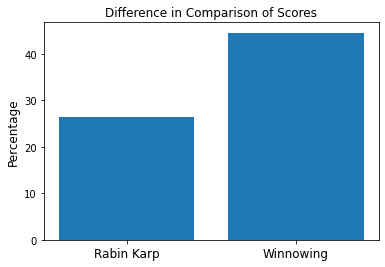

In [41]:
rb = np.mean(hasilrab)
wn = np.mean(hasilwin)
x = [rb,wn]
y = ['Rabin Karp','Winnowing']
    
index = np.arange(len(y))
plt.bar(index, x)

plt.ylabel('Percentage', fontsize=12)
#plt.ylabel('Persentase', fontsize=12)
plt.xticks(index, y, fontsize=12)
plt.title('Difference in Comparison of Scores')
#plt.title('Selisih Perbandingan Penilaian')
plt.savefig('testplot2.png', dpi=300, transparent=True)
plt.show()

In [42]:
allmean={
        "Rabinkarp":[np.mean(nilairab[0]),np.mean(nilairab[1]),np.mean(nilairab[2])
                     ,np.mean(nilairab[3]),np.mean(nilairab[4]),np.mean(nilairab[5])
                     ,np.mean(nilairab[6]),np.mean(nilairab[7])],
        "Winnowing":[np.mean(nilaiwin[0]),np.mean(nilaiwin[1]),np.mean(nilaiwin[2])
                     ,np.mean(nilaiwin[3]),np.mean(nilaiwin[4]),np.mean(nilaiwin[5])
                     ,np.mean(nilaiwin[6]),np.mean(nilaiwin[7])],
        "Lecturer scores":[np.mean(nilaidosen["1"]),np.mean(nilaidosen["2"]),np.mean(nilaidosen["3"])
                     ,np.mean(nilaidosen["4"]),np.mean(nilaidosen["5"]),np.mean(nilaidosen["6"])
                     ,np.mean(nilaidosen["7"]),np.mean(nilaidosen["8"])],
        }
dfmean = pd.DataFrame(allmean)

In [43]:
jawaban["8"][0]

'Komunikasi Internal Komunikasi internal adalah komunikasi yang dijalin dalam internal organisasi tersebut, sebagai contoh interaksi antara atasan-bawahan (komunikasi vertikal) maupun rekan sejawat dalam organisasi (komunikasi horizontal). Komunikasi Eksternal Komunikasi eksternal adalah komunikasi organisasi ke luar dari bagian organisasi, dalam hal ini masyarakat umum. Biasanya yang menjadi komunikator adalah seorang humas (hubungan masyarakat)'

In [44]:
rab = {"1":nilairab[0],"2":nilairab[1],"3":nilairab[2],"4":nilairab[3],
       "5":nilairab[4],"6":nilairab[5],"7":nilairab[6],"8":nilairab[7]}
dfrab = pd.DataFrame(rab)
dfrab.head(10)

,1,2,3,4,5,6,7,8
0,30,60,90,80,40,70,80,80
1,40,80,60,60,50,40,70,60
2,40,70,60,70,90,100,80,80
3,60,100,40,70,60,60,50,50
4,60,90,100,60,100,70,70,80
5,40,100,50,90,80,70,60,80
6,30,60,40,80,50,50,70,60
7,50,100,40,80,40,50,80,60
8,50,70,40,30,50,40,90,70
9,40,60,40,40,100,50,100,70


In [45]:
win = {"1":nilaiwin[0],"2":nilaiwin[1],"3":nilaiwin[2],"4":nilaiwin[3],
       "5":nilaiwin[4],"6":nilaiwin[5],"7":nilaiwin[6],"8":nilaiwin[7]}
dfwin = pd.DataFrame(win)
dfwin.head(10)

,1,2,3,4,5,6,7,8
0,10,20,20,80,20,20,20,80
1,30,40,20,60,20,40,30,60
2,10,40,20,70,30,60,40,80
3,20,70,10,70,20,40,20,50
4,10,40,20,40,30,30,20,80
5,40,70,10,90,20,70,30,80
6,10,30,10,70,20,40,30,50
7,40,100,10,80,20,10,30,50
8,10,40,10,10,30,30,30,10
9,10,40,20,20,20,40,30,10


In [46]:
dfdosen = pd.DataFrame(nilaidosen)
dfdosen.head(6)

,1,2,3,4,5,6,7,8
0,70,90,10,90,80,10,40,100
1,70,90,60,90,80,70,80,100
2,70,90,70,80,100,100,90,100
3,80,100,60,80,90,70,60,90
4,60,90,80,80,90,60,10,100
5,80,100,10,100,80,80,80,100


In [47]:
dfmean

,Rabinkarp,Winnowing,Lecturer scores
0,40.769231,24.102564,70.256410
1,76.923077,46.153846,91.538462
2,51.538462,14.102564,60.512821
3,66.923077,54.615385,85.128205
4,59.743590,21.538462,91.794872
5,51.282051,36.153846,68.717949
6,71.282051,26.410256,70.512821
7,59.487179,50.000000,83.333333


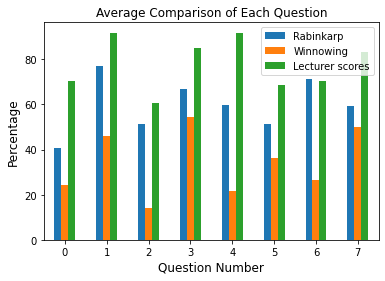

In [48]:
ax = dfmean.plot.bar(rot=0)
plt.ylabel('Percentage', fontsize=12)
#plt.ylabel('Persentase', fontsize=12)
plt.xlabel('Question Number', fontsize=12)
#plt.xlabel('Nomor Soal', fontsize=12)
plt.title('Average Comparison of Each Question')
#plt.title('Rata-rata Perbandingan Setiap Soal')
plt.savefig('testplot.png', dpi=300, transparent=True)
plt.show()


In [49]:
len(allrab)
#allrab[0]


8

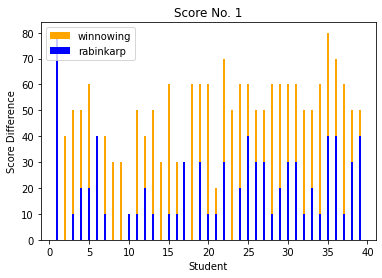

In [50]:
x1 = list(range(1,40))
y1 = allwin[2]
plt.bar(x1, y1, label = "winnowing", color="orange", width = 0.25)

x2 = list(range(1,40))
y2 = allrab[2]
plt.bar(x2, y2, label = "rabinkarp",color="blue", width = 0.25)

#print(x)
#plt.plot(x,y)

# naming the x-axis
plt.xlabel('Student')
# naming the y-axis
plt.ylabel('Score Difference')
# plot title
plt.title('Score No. 1')
plt.legend()
plt.savefig('Score No 1.png', dpi=300, transparent=True)
plt.show()

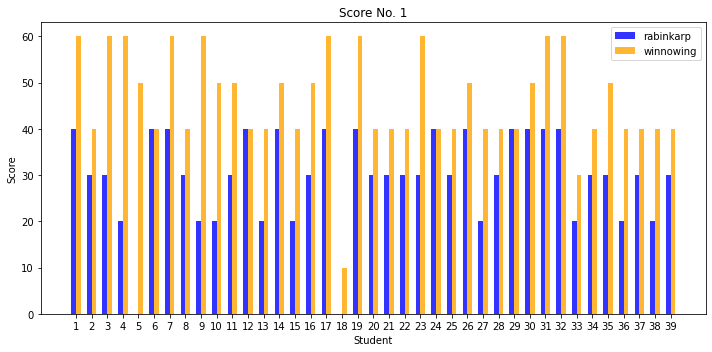

In [58]:
n_groups = 39
rabinkarp = allrab[0]
winnowing = allwin[0]

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, rabinkarp, bar_width,
alpha=opacity,
color='blue',
label='rabinkarp',
align='edge')

rects2 = plt.bar(index + bar_width, winnowing, bar_width,
alpha=opacity,
color='orange',
label='winnowing',
align='edge')

plt.xlabel('Student')
plt.ylabel('Score')
plt.title('Score No. 1')
plt.xticks(index + bar_width, (list(range(1,40))))
plt.legend()

plt.tight_layout()
plt.savefig('Score No 1.png', dpi=300, transparent=True)
plt.show()

In [53]:
jawaban["8"][10]

'Dimensi makro Dimensi makro lebih menggambarkan hubungan antara media dengan berbagai institusi, misalkan politik, ekonomi, pendidikan, agama, dan lain sebagainya. Atau kita bisa mengatakan bahwa dimensi makro adalah dimensi yang memperhatikan dari sisi media kepada masyarakat luas. Teori-teori yang mengkaji mengenai dimensi ini biasanya akan menjelaskan bagaimana kedudukan dan pengaruh media dalam masyarakat. Dimensi mikro Dimensi mikro memperhatikan bagaimana pengaruh media terhadap suatu kelompok atau individu. Teori dalam dimensi mikro mempelajari bagaimana hubungan antara media dengan audiens, dimana di sini lebih ditekankan efek yang terlihat dari individu atau kelompok sebagai hasil dari media massa. Kita bisa melihat perbedaannya dengan dimensi makro, yaitu bahwa dimensi mikro memiliki ruang lingkup yang lebih kecil dan lebih detail.'

In [54]:
print(kunci["8"][0])

Komunikasi internal adalah komunikasi yang dijalin dalam internal organisasi tersebut, sebagai contoh interaksi antara atasan-bawahan (komunikasi vertikal) maupun rekan sejawat dalam organisasi (komunikasi horizontal). Komunikasi eksternal adalah komunikasi organisasi ke luar dari bagian organisasi, dalam hal ini masyarakat umum. Biasanya yang menjadi komunikator adalah seorang humas (hubungan masyarakat). Kadangkala pimpinan organisasi juga menjadi komunikator, namun hanya untuk hal penting yang memang hanya bisa/harus disampaikan langsung oleh pimpinan organisasi. Komunikasi ini terbagi 2 (dua) yaitu komunikasi dari organisasi ke khalayak ramai  (biasanya menggunakan press release, liftlet, spanduk, media cetak dan online, selebaran, dll) dan komunikasi dari khalayak ramai ke organisasi (biasanya tatap muka secara lisan, atau mengirimkan surat).


In [55]:
tst1 = pd.DataFrame(allrab)

In [56]:
tst2 = pd.DataFrame(allwin)
tst2

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,60,40,60,60,50,40,60,40,60,50,...,50,60,60,30,40,50,40,40,40,40
1,70,50,50,30,50,30,50,10,50,30,...,70,80,60,30,40,80,60,70,40,60
2,10,40,50,50,60,0,40,30,30,10,...,60,60,50,50,60,80,70,60,50,50
3,10,30,10,10,40,10,20,20,0,40,...,20,70,70,20,60,50,20,10,20,30
4,60,60,70,70,60,60,70,60,60,80,...,90,70,70,60,80,70,70,80,80,80
5,10,30,40,30,30,10,30,40,40,30,...,40,0,10,50,50,10,0,50,40,50
6,20,50,50,40,10,50,60,20,10,20,...,60,40,40,60,60,60,70,60,60,70
7,20,40,20,40,20,20,50,50,0,0,...,60,0,40,50,50,0,30,20,30,50


In [57]:
allrab[7]

[20,
 40,
 20,
 40,
 20,
 20,
 40,
 40,
 60,
 60,
 60,
 20,
 40,
 30,
 50,
 40,
 30,
 20,
 30,
 60,
 20,
 60,
 50,
 60,
 40,
 30,
 50,
 20,
 60,
 60,
 60,
 20,
 50,
 40,
 20,
 30,
 20,
 30,
 50]

In [58]:
allwin[7]

[20,
 40,
 20,
 40,
 20,
 20,
 50,
 50,
 0,
 0,
 0,
 30,
 40,
 30,
 50,
 50,
 30,
 20,
 30,
 60,
 20,
 60,
 60,
 60,
 40,
 10,
 60,
 20,
 60,
 60,
 0,
 40,
 50,
 50,
 0,
 30,
 20,
 30,
 50]